## Durban Weather Data set 

This data set is from 2022-04-01 to 2022-04-31. A period where Durban experienced severe floods.
Here, the weather data set is a Time-series data set with per-hour information about Durban weaher conditions that brought floods.This data set is availble as a csv file format. We are going to analyse this data using pandas and other relevant python packages.

In this workbook I walk through an analysis of Durban wearther data set which resulted to floods. My  goal is to get dirty with the data set.Gain insight, find answers to weather problems using historical data on weather patterns that result to floods, destroying infrastructure, damaging community residents and leading to loss of lives.

I will touch on:

1. Basic data cleaning and exploration.
2. Exploratory data analysis (answering questions about the data set).

Load python packages(Libraries)

In [1]:
# Python libraries
import pandas as pd 
import seaborn as sns 
import numpy as np
import scipy as stats 
import matplotlib.pyplot as plt
%matplotlib inline

### load data set

In [2]:
data = pd.read_csv(r"C:\Users\Sekwanele Njoko\Desktop\Data Science\Durban weather Project\Durban,South Africa 2022-04-01 to 2022-04-30.csv")
data

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Durban,South Africa",2022-04-01T00:00:00,24.0,24.0,22.0,88.60,0.000,0,NaN,0,...,1015.0,27.4,10.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"FALE,68592099999"
1,"Durban,South Africa",2022-04-01T01:00:00,21.0,21.0,18.0,82.99,0.000,0,NaN,0,...,1016.0,88.9,8.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"FALE,68592099999"
2,"Durban,South Africa",2022-04-01T02:00:00,21.7,21.7,17.3,76.00,0.014,100,rain,0,...,1016.5,88.9,8.0,0,0.0,0,10,"Rain, Partially cloudy",rain,"68588099999,FALE,68593099999,68583099999,68592..."
3,"Durban,South Africa",2022-04-01T03:00:00,20.0,20.0,17.0,82.87,0.000,0,rain,0,...,1016.0,88.9,8.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"FALE,68592099999"
4,"Durban,South Africa",2022-04-01T04:00:00,19.0,19.0,17.0,88.19,0.000,0,rain,0,...,1016.0,88.9,10.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"FALE,68592099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,"Durban,South Africa",2022-04-30T19:00:00,18.0,18.0,14.0,77.46,0.000,0,NaN,0,...,1022.0,27.4,10.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"FALE,68592099999"
716,"Durban,South Africa",2022-04-30T20:00:00,18.9,18.9,14.2,74.22,0.000,0,NaN,0,...,1023.2,27.4,10.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"68588099999,FALE,68593099999,68583099999,68592..."
717,"Durban,South Africa",2022-04-30T21:00:00,16.5,16.5,13.0,79.80,0.000,0,NaN,0,...,1023.0,23.9,24.1,0,0.0,0,10,Partially cloudy,partly-cloudy-night,remote
718,"Durban,South Africa",2022-04-30T22:00:00,16.0,16.0,13.0,82.39,0.000,0,NaN,0,...,1024.0,41.2,10.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"FALE,68592099999"


### How to analyze data frame

### Drop columns

In [3]:
data = data.drop(columns  = ["icon","precip", "uvindex", "solarenergy", "snow", "solarradiation", "precipprob", "snowdepth" , "stations", "winddir", "feelslike", "windgust", "severerisk"]) 

#### .head()
it shows the first number(N) of rows in the dat (default N = 5)


In [4]:
data.head()

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,conditions
0,"Durban,South Africa",2022-04-01T00:00:00,24.0,22.0,88.60,NaN,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01T01:00:00,21.0,18.0,82.99,NaN,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01T02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"
3,"Durban,South Africa",2022-04-01T03:00:00,20.0,17.0,82.87,rain,11.2,1016.0,88.9,8.0,Partially cloudy
4,"Durban,South Africa",2022-04-01T04:00:00,19.0,17.0,88.19,rain,1.8,1016.0,88.9,10.0,Partially cloudy


### .shape
it show the total NO of rows and No of columns, of the data frame

In [5]:
data.shape

(720, 11)

### .index
this attribute provides the index of the data frame

In [6]:
data.index

RangeIndex(start=0, stop=720, step=1)

### .columns
it shows the name of each  column

In [7]:
data.columns

Index(['name', 'datetime', 'temp', 'dew', 'humidity', 'preciptype',
       'windspeed', 'sealevelpressure', 'cloudcover', 'visibility',
       'conditions'],
      dtype='object')

### .iloc[]
reads each column and rows

In [8]:
data.iloc[0: 4,[2, 3, 4, 5, 6, 7, 8, 9]]

,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility
0,24.0,22.0,88.60,NaN,7.6,1015.0,27.4,10.0
1,21.0,18.0,82.99,NaN,35.3,1016.0,88.9,8.0
2,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0
3,20.0,17.0,82.87,rain,11.2,1016.0,88.9,8.0


### .dtypes
it shows the data type of each column

In [9]:
data.dtypes

name                 object
datetime             object
temp                float64
dew                 float64
humidity            float64
preciptype           object
windspeed           float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
conditions           object
dtype: object

### .unique()
in a column, it shows all the unique values it can be applied on a single column only. Not the whole data frame.


In [10]:
data["conditions"].unique()

array(['Partially cloudy', 'Rain, Partially cloudy', 'Overcast',
       'Rain, Overcast', 'Clear', 'Rain'], dtype=object)

In [11]:
data['windspeed'].unique()

array([ 7.6, 35.3, 12.3, 11.2,  1.8,  1.7, 23.9,  2.1,  5.4, 25. ,  7.1,
       13. , 10.8,  6. , 23.8,  5.9,  9.9, 23. , 21.9,  3.4, 18.3,  4.8,
       19.9,  3.6,  4.7, 22.2,  8.9,  9.4,  8.2,  7.9, 21.1,  2.5,  7.8,
        4.2, 10.9,  0.9,  4.6, 20.9,  8.1, 14.8,  9.3, 20.3, 17.9,  3.7,
       15.8,  4.5, 15.2,  6.9, 22.5,  6.3, 21.4,  9.8,  9.2,  6.6,  4.1,
       18.7, 12.8,  8.6, 26.6, 15.4, 28.8, 27.7, 14.1, 14.3,  8. ,  3.1,
        0. ,  2.8, 20.7, 10.2, 21.8, 11.6, 16.9,  8.3, 22.3, 13.5, 22.4,
       28.2, 13.2, 16.6, 31.2, 13.9, 18.4, 23.2, 14.9, 20.5, 12.7, 23.3,
       12. ,  6.8, 26.2,  7.3, 24.7, 27.1, 12.9, 17.1, 21. , 21.5, 24.3,
       19.3,  5.3,  5.5, 20.4,  2.9, 18.2, 15.1,  4.9,  1.4,  2.2,  3.5,
       16.5,  3.9,  5.8,  4. , 17.7,  5.1, 15.6,  7.7,  8.7, 19.4, 18.1,
       14.5, 19. , 23.7, 24.9, 16.7, 19.1, 33.5, 24.1, 16.4, 25.6, 14. ,
       11.5, 10.4,  8.4,  5. , 13.4,  6.7, 11. , 12.1,  9.1, 14.4,  1. ,
        8.8,  1.2, 25.9, 23.5, 26.7, 15.5, 24.5, 12

In [12]:
data["cloudcover"].unique()

array([ 27.4,  88.9, 100. ,  71.5,  55.9,  63. ,  73. ,  62.3,  50. ,
        41.5,  90.5,  85.3,  81.5,  88.7,  75.4,  66. ,  94.7,  46.9,
        38. ,  36.8,  90. ,  24.9,  91.3,  99.9,  75. ,  36.3,  53.1,
         0.8,  88. ,  17.9,   0. ,  46.2,  83.4,  88.6,  74.8,  93.3,
        91.8,  96.9,  90.1,  73.6,  75.8,  72.4,  68.8,  97.1,  80.3,
        56.4,  14. ,   7.5,  51.8,  67.5,  60. ,  80. ,  45.2,  99.6,
        78.9,   6.1,   3.5,   0.1,   2.9,   5.1,   5. ,   4.5,   0.2,
         0.9,   4.9,  14.4,  39.7,  77.1,  61.1,  93.7,  55.7,  98.3,
        40.5,   8.4,  10.7,   4. ,   1.3,   4.1,  17.3,   2.5,   3.2,
        32.9,   4.2,   2. ,   2.1,   3.3,  17.5,  64.8,   4.6,   1.5,
         2.8,   2.7,   2.3,   3.7,  22.4,  98.1,  51.5,  70.3,  31.6,
        50.8,  44.7,  22.7,  48.2,   5.5,  30. ,   0.6,   1.1,   8.2,
        10.1,   0.3,   3.6,  62.8,  11. ,   6.3,  18. ,   8.3,   0.5,
        23.9,  41.2,  50.5])

### .nunique()
it shows the tolal number of unique values in each column it can be apllied on a single column as well as on whole data frame

In [13]:
data.nunique()

name                  1
datetime            720
temp                118
dew                 118
humidity            404
preciptype            1
windspeed           195
sealevelpressure    175
cloudcover          120
visibility           37
conditions            6
dtype: int64

In [14]:
data["temp"].nunique()

118

### .count 
it shows the total number of no-null values it can be applied on a single column as well as on  whhole data frame

In [15]:
data.count()

name                720
datetime            720
temp                720
dew                 720
humidity            720
preciptype          241
windspeed           720
sealevelpressure    720
cloudcover          720
visibility          720
conditions          720
dtype: int64

### .value_counts()
in column, it shows all the unique values with their count it can be applied on a single column only

In [16]:
data["conditions"].value_counts()

conditions
Partially cloudy          321
Clear                     179
Overcast                  161
Rain, Partially cloudy     28
Rain, Overcast             26
Rain                        5
Name: count, dtype: int64

### .info()
provides basic information about the data frame

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              720 non-null    object 
 1   datetime          720 non-null    object 
 2   temp              720 non-null    float64
 3   dew               720 non-null    float64
 4   humidity          720 non-null    float64
 5   preciptype        241 non-null    object 
 6   windspeed         720 non-null    float64
 7   sealevelpressure  720 non-null    float64
 8   cloudcover        720 non-null    float64
 9   visibility        720 non-null    float64
 10  conditions        720 non-null    object 
dtypes: float64(7), object(4)
memory usage: 62.0+ KB


### .deacribe()

In [18]:
data.describe()

,temp,dew,humidity,windspeed,sealevelpressure,cloudcover,visibility
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,20.414583,16.601389,79.847069,10.982500,1017.333750,56.376667,9.941389
std,3.418850,3.100617,12.112416,7.085349,6.085559,39.799698,2.069658
min,10.000000,3.400000,37.820000,0.000000,1004.500000,0.000000,1.000000
25%,18.000000,14.700000,72.737500,5.400000,1012.075000,16.575000,10.000000
50%,20.300000,17.000000,82.990000,9.400000,1017.000000,68.800000,10.000000
75%,23.000000,19.000000,88.270000,15.125000,1022.500000,91.425000,10.000000
max,28.400000,23.600000,94.980000,35.300000,1029.900000,100.000000,24.100000


## Solving questions

### Q) 1. Find all the unique "windspeed" values in the data?

In [19]:
data["windspeed"].unique() #answer

array([ 7.6, 35.3, 12.3, 11.2,  1.8,  1.7, 23.9,  2.1,  5.4, 25. ,  7.1,
       13. , 10.8,  6. , 23.8,  5.9,  9.9, 23. , 21.9,  3.4, 18.3,  4.8,
       19.9,  3.6,  4.7, 22.2,  8.9,  9.4,  8.2,  7.9, 21.1,  2.5,  7.8,
        4.2, 10.9,  0.9,  4.6, 20.9,  8.1, 14.8,  9.3, 20.3, 17.9,  3.7,
       15.8,  4.5, 15.2,  6.9, 22.5,  6.3, 21.4,  9.8,  9.2,  6.6,  4.1,
       18.7, 12.8,  8.6, 26.6, 15.4, 28.8, 27.7, 14.1, 14.3,  8. ,  3.1,
        0. ,  2.8, 20.7, 10.2, 21.8, 11.6, 16.9,  8.3, 22.3, 13.5, 22.4,
       28.2, 13.2, 16.6, 31.2, 13.9, 18.4, 23.2, 14.9, 20.5, 12.7, 23.3,
       12. ,  6.8, 26.2,  7.3, 24.7, 27.1, 12.9, 17.1, 21. , 21.5, 24.3,
       19.3,  5.3,  5.5, 20.4,  2.9, 18.2, 15.1,  4.9,  1.4,  2.2,  3.5,
       16.5,  3.9,  5.8,  4. , 17.7,  5.1, 15.6,  7.7,  8.7, 19.4, 18.1,
       14.5, 19. , 23.7, 24.9, 16.7, 19.1, 33.5, 24.1, 16.4, 25.6, 14. ,
       11.5, 10.4,  8.4,  5. , 13.4,  6.7, 11. , 12.1,  9.1, 14.4,  1. ,
        8.8,  1.2, 25.9, 23.5, 26.7, 15.5, 24.5, 12

In [20]:
data.nunique()

name                  1
datetime            720
temp                118
dew                 118
humidity            404
preciptype            1
windspeed           195
sealevelpressure    175
cloudcover          120
visibility           37
conditions            6
dtype: int64

In [21]:
data["windspeed"].nunique()

195

### Q) 2. Find the number of times when the weather conditions was clear?

In [22]:
#data['conditions'].unique()
data[data.conditions == 'clear']

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,conditions


In [23]:
data['conditions'].value_counts() # Answer


conditions
Partially cloudy          321
Clear                     179
Overcast                  161
Rain, Partially cloudy     28
Rain, Overcast             26
Rain                        5
Name: count, dtype: int64

### Q) 3. Find the number of times when the windspeed was exactly 4?

In [24]:
data.head(2)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,conditions
0,"Durban,South Africa",2022-04-01T00:00:00,24.0,22.0,88.60,NaN,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01T01:00:00,21.0,18.0,82.99,NaN,35.3,1016.0,88.9,8.0,Partially cloudy


In [25]:
data[data['windspeed'] == 4.1]

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,conditions
95,"Durban,South Africa",2022-04-04T23:00:00,23.1,16.8,67.53,NaN,4.1,1006.1,0.8,10.0,Clear
329,"Durban,South Africa",2022-04-14T17:00:00,24.7,19.5,73.12,NaN,4.1,1008.8,2.9,10.0,Clear
392,"Durban,South Africa",2022-04-17T08:00:00,16.6,15.3,92.17,rain,4.1,1026.5,100.0,10.0,"Rain, Overcast"
413,"Durban,South Africa",2022-04-18T05:00:00,17.1,16.0,93.06,NaN,4.1,1019.3,100.0,10.0,Overcast


### Q) 4. Find out all the Null values in the data set?

In [26]:
data.isnull()

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,conditions
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
715,False,False,False,False,False,True,False,False,False,False,False
716,False,False,False,False,False,True,False,False,False,False,False
717,False,False,False,False,False,True,False,False,False,False,False
718,False,False,False,False,False,True,False,False,False,False,False


In [27]:
data.isna().sum()

name                  0
datetime              0
temp                  0
dew                   0
humidity              0
preciptype          479
windspeed             0
sealevelpressure      0
cloudcover            0
visibility            0
conditions            0
dtype: int64

### Q) 5. Rename the cloumn "conditions" of the data frame to "weather condtion"

In [28]:
data = data.rename(columns = {'conditions': 'weather_condition'})
#data = data.rename(columns = {'old_column_name1': 'new_column_name1','old_column_name2': 'new_column2'}, axis = 1, inplace = True)
data.head(3)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01T00:00:00,24.0,22.0,88.60,NaN,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01T01:00:00,21.0,18.0,82.99,NaN,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01T02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"


### Q) 6. What is the mean "visibility"?

In [29]:
mean_vis = data['visibility'].mean()
mean_vis

9.941388888888888

### Q) 7. Find all instances when rain was recorded.

In [30]:
data.head(2)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01T00:00:00,24.0,22.0,88.60,NaN,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01T01:00:00,21.0,18.0,82.99,NaN,35.3,1016.0,88.9,8.0,Partially cloudy


In [31]:
data['weather_condition'].value_counts()

weather_condition
Partially cloudy          321
Clear                     179
Overcast                  161
Rain, Partially cloudy     28
Rain, Overcast             26
Rain                        5
Name: count, dtype: int64

In [32]:
#data[data['weather_condtion'] == 'Overcast']
data[data['weather_condition'] == 'Rain']

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
326,"Durban,South Africa",2022-04-14T14:00:00,25.8,19.8,69.12,rain,9.8,1008.6,0.0,10.0,Rain
344,"Durban,South Africa",2022-04-15T08:00:00,22.6,19.1,80.51,rain,2.9,1012.0,14.4,10.0,Rain
464,"Durban,South Africa",2022-04-20T08:00:00,19.3,15.5,79.05,rain,4.8,1024.9,0.0,10.0,Rain
488,"Durban,South Africa",2022-04-21T08:00:00,19.7,14.7,72.90,rain,3.1,1019.3,4.2,10.0,Rain
710,"Durban,South Africa",2022-04-30T14:00:00,23.8,13.1,51.23,rain,18.0,1018.1,0.0,10.0,Rain


### Q) 8. Show all the records where weather_condition is clear?

In [33]:
data['weather_condition'].value_counts()

weather_condition
Partially cloudy          321
Clear                     179
Overcast                  161
Rain, Partially cloudy     28
Rain, Overcast             26
Rain                        5
Name: count, dtype: int64

In [34]:
data[data['weather_condition'] == 'Clear']


,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
95,"Durban,South Africa",2022-04-04T23:00:00,23.1,16.8,67.53,NaN,4.1,1006.1,0.8,10.0,Clear
101,"Durban,South Africa",2022-04-05T05:00:00,22.6,10.3,45.89,NaN,12.8,1008.1,17.9,14.7,Clear
102,"Durban,South Africa",2022-04-05T06:00:00,21.0,18.0,82.99,NaN,9.4,1008.0,0.0,10.0,Clear
103,"Durban,South Africa",2022-04-05T07:00:00,21.0,18.0,82.99,NaN,1.8,1009.0,0.0,10.0,Clear
104,"Durban,South Africa",2022-04-05T08:00:00,24.5,18.1,67.42,NaN,8.6,1010.0,0.0,10.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...
692,"Durban,South Africa",2022-04-29T20:00:00,23.3,18.5,74.05,NaN,3.6,1010.3,18.0,10.0,Clear
706,"Durban,South Africa",2022-04-30T10:00:00,23.0,15.0,60.70,NaN,24.1,1018.0,8.3,10.0,Clear
711,"Durban,South Africa",2022-04-30T15:00:00,22.0,13.0,56.66,NaN,24.1,1018.0,0.0,10.0,Clear
712,"Durban,South Africa",2022-04-30T16:00:00,22.0,13.0,56.66,NaN,24.1,1019.0,0.0,10.0,Clear


### 8.1 Show all the records where "preciptype" was "Rain"

In [35]:
data['preciptype'].value_counts()

preciptype
rain    241
Name: count, dtype: int64

In [36]:
data.loc[data.preciptype == 'rain']

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
2,"Durban,South Africa",2022-04-01T02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"
3,"Durban,South Africa",2022-04-01T03:00:00,20.0,17.0,82.87,rain,11.2,1016.0,88.9,8.0,Partially cloudy
4,"Durban,South Africa",2022-04-01T04:00:00,19.0,17.0,88.19,rain,1.8,1016.0,88.9,10.0,Partially cloudy
8,"Durban,South Africa",2022-04-01T08:00:00,23.8,18.2,71.16,rain,2.1,1015.8,71.5,10.0,"Rain, Partially cloudy"
14,"Durban,South Africa",2022-04-01T14:00:00,26.0,18.5,63.09,rain,10.8,1013.8,27.4,10.0,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...
697,"Durban,South Africa",2022-04-30T01:00:00,21.0,17.0,77.91,rain,33.5,1015.0,88.9,10.0,Partially cloudy
698,"Durban,South Africa",2022-04-30T02:00:00,20.3,16.1,77.07,rain,13.2,1015.9,50.0,10.0,"Rain, Partially cloudy"
700,"Durban,South Africa",2022-04-30T04:00:00,19.0,15.0,77.62,rain,20.5,1015.0,50.0,10.0,Partially cloudy
704,"Durban,South Africa",2022-04-30T08:00:00,20.4,14.4,68.82,rain,11.5,1018.2,100.0,10.0,"Rain, Overcast"


### 8.2 Show all the records where  'humidity' was >= 80 and preciptype was 'rain'

In [37]:
data.loc[(data.preciptype == 'rain') & (data.humidity >= 80)]

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
3,"Durban,South Africa",2022-04-01T03:00:00,20.0,17.0,82.87,rain,11.2,1016.0,88.9,8.0,Partially cloudy
4,"Durban,South Africa",2022-04-01T04:00:00,19.0,17.0,88.19,rain,1.8,1016.0,88.9,10.0,Partially cloudy
18,"Durban,South Africa",2022-04-01T18:00:00,25.4,22.4,83.84,rain,23.8,1015.0,41.5,10.0,Partially cloudy
19,"Durban,South Africa",2022-04-01T19:00:00,23.0,20.0,83.22,rain,7.6,1015.0,27.4,10.0,Partially cloudy
20,"Durban,South Africa",2022-04-01T20:00:00,23.1,20.3,84.08,rain,5.9,1015.5,88.9,10.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...
580,"Durban,South Africa",2022-04-25T04:00:00,18.0,16.0,88.10,rain,7.6,1015.0,100.0,10.0,Overcast
582,"Durban,South Africa",2022-04-25T06:00:00,18.0,15.0,82.63,rain,11.2,1016.0,100.0,10.0,Overcast
584,"Durban,South Africa",2022-04-25T08:00:00,18.5,15.4,82.14,rain,10.5,1017.8,100.0,10.0,"Rain, Overcast"
585,"Durban,South Africa",2022-04-25T09:00:00,18.0,15.0,82.63,rain,11.2,1017.0,100.0,10.0,Overcast


### Q) 9. Remove NaN values in the data set.

In [38]:
# set up the simple  imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'constant', fill_value = 'No rain')

# Apply the imputer

data['preciptype'] = imputer.fit_transform(data[['preciptype']]).ravel()
data

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01T00:00:00,24.0,22.0,88.60,No rain,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01T01:00:00,21.0,18.0,82.99,No rain,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01T02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"
3,"Durban,South Africa",2022-04-01T03:00:00,20.0,17.0,82.87,rain,11.2,1016.0,88.9,8.0,Partially cloudy
4,"Durban,South Africa",2022-04-01T04:00:00,19.0,17.0,88.19,rain,1.8,1016.0,88.9,10.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...
715,"Durban,South Africa",2022-04-30T19:00:00,18.0,14.0,77.46,No rain,11.2,1022.0,27.4,10.0,Partially cloudy
716,"Durban,South Africa",2022-04-30T20:00:00,18.9,14.2,74.22,No rain,8.2,1023.2,27.4,10.0,Partially cloudy
717,"Durban,South Africa",2022-04-30T21:00:00,16.5,13.0,79.80,No rain,10.8,1023.0,23.9,24.1,Partially cloudy
718,"Durban,South Africa",2022-04-30T22:00:00,16.0,13.0,82.39,No rain,9.4,1024.0,41.2,10.0,Partially cloudy


In [39]:
#data.fillna("No rain")
#data['preciptype'].replace(np, nan,'No rain')
#data['preciptype'].fill('No rain')
#data.fillna('No rain', inplace= True)

### Q) 10. Convert date and time column to pandas date format?

In [40]:
data['datetime']= pd.to_datetime(data['datetime'])
data

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01 00:00:00,24.0,22.0,88.60,No rain,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01 01:00:00,21.0,18.0,82.99,No rain,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01 02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"
3,"Durban,South Africa",2022-04-01 03:00:00,20.0,17.0,82.87,rain,11.2,1016.0,88.9,8.0,Partially cloudy
4,"Durban,South Africa",2022-04-01 04:00:00,19.0,17.0,88.19,rain,1.8,1016.0,88.9,10.0,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...
715,"Durban,South Africa",2022-04-30 19:00:00,18.0,14.0,77.46,No rain,11.2,1022.0,27.4,10.0,Partially cloudy
716,"Durban,South Africa",2022-04-30 20:00:00,18.9,14.2,74.22,No rain,8.2,1023.2,27.4,10.0,Partially cloudy
717,"Durban,South Africa",2022-04-30 21:00:00,16.5,13.0,79.80,No rain,10.8,1023.0,23.9,24.1,Partially cloudy
718,"Durban,South Africa",2022-04-30 22:00:00,16.0,13.0,82.39,No rain,9.4,1024.0,41.2,10.0,Partially cloudy


### Q) 11. Check for duplicated rows

In [41]:
data.head(3)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01 00:00:00,24.0,22.0,88.60,No rain,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01 01:00:00,21.0,18.0,82.99,No rain,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01 02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"


In [42]:
duplicate_rows = data.duplicated().sum
print(f'count of duplicated rows: {duplicate_rows}')

count of duplicated rows: <bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
715    False
716    False
717    False
718    False
719    False
Length: 720, dtype: bool>


## Exploratory Data Analysis

In [43]:
#data.hist(bins=50, figsize=(20,15))

### Exclude the date time column

<function matplotlib.pyplot.show(close=None, block=None)>

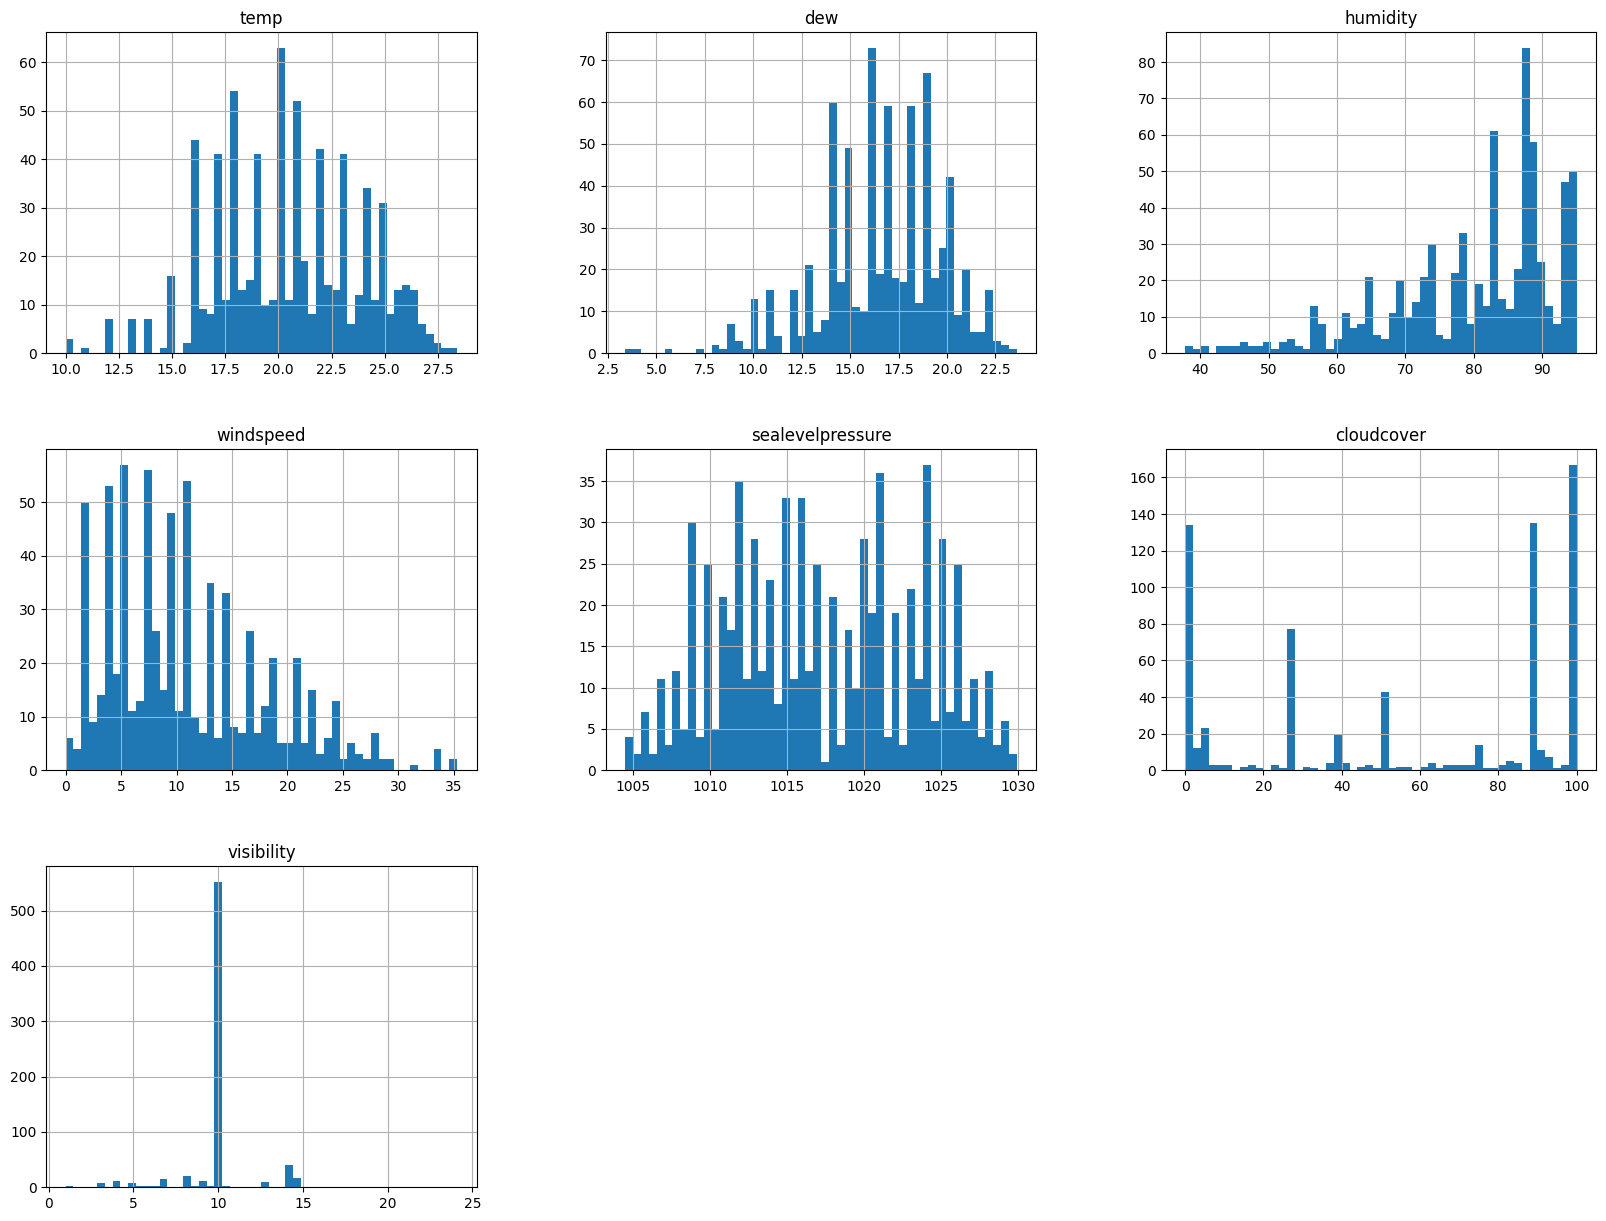

In [44]:
numeric_data = data.select_dtypes(include=['number'])
numeric_data.hist(bins=50, figsize=(20,15))
plt.show

### Data Visualizasions

In [45]:
numeric_data.describe()

,temp,dew,humidity,windspeed,sealevelpressure,cloudcover,visibility
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,20.414583,16.601389,79.847069,10.982500,1017.333750,56.376667,9.941389
std,3.418850,3.100617,12.112416,7.085349,6.085559,39.799698,2.069658
min,10.000000,3.400000,37.820000,0.000000,1004.500000,0.000000,1.000000
25%,18.000000,14.700000,72.737500,5.400000,1012.075000,16.575000,10.000000
50%,20.300000,17.000000,82.990000,9.400000,1017.000000,68.800000,10.000000
75%,23.000000,19.000000,88.270000,15.125000,1022.500000,91.425000,10.000000
max,28.400000,23.600000,94.980000,35.300000,1029.900000,100.000000,24.100000


### correlation among the features:

In [46]:
cols = ['temp','dew','humidity','windspeed', 'sealevelpressure', 'cloudcover', 'visibility']

In [47]:
corr_matrix = data[cols].corr()
corr_matrix

,temp,dew,humidity,windspeed,sealevelpressure,cloudcover,visibility
temp,1.000000,0.656879,-0.508413,0.319028,-0.538707,0.073756,0.224880
dew,0.656879,1.000000,0.310281,0.131526,-0.501979,0.308089,0.076186
humidity,-0.508413,0.310281,1.000000,-0.269078,0.099618,0.255260,-0.203994
windspeed,0.319028,0.131526,-0.269078,1.000000,0.052136,0.227371,0.026933
sealevelpressure,-0.538707,-0.501979,0.099618,0.052136,1.000000,0.090947,-0.224596
cloudcover,0.073756,0.308089,0.255260,0.227371,0.090947,1.000000,-0.162332
visibility,0.224880,0.076186,-0.203994,0.026933,-0.224596,-0.162332,1.000000


### Heat map:

<Axes: >

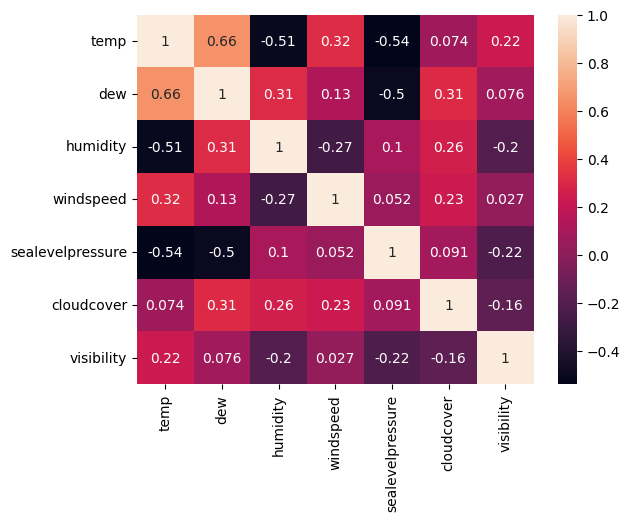

In [48]:
sns.heatmap(corr_matrix , annot = True)

In [49]:
#cols = ['temp','dew','humidity','windspeed', 'sealevelpressure', 'cloudcover', 'visibility']

<Axes: ylabel='Frequency'>

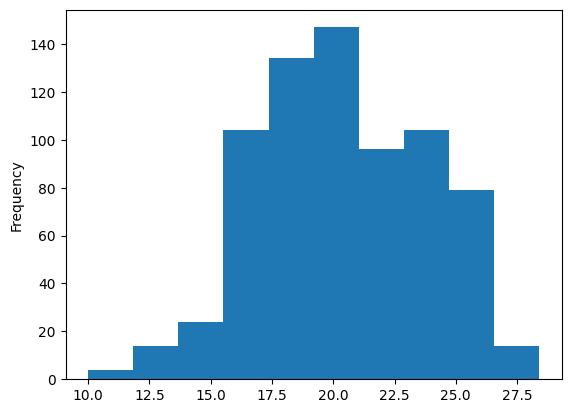

In [50]:
numeric_data['temp'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

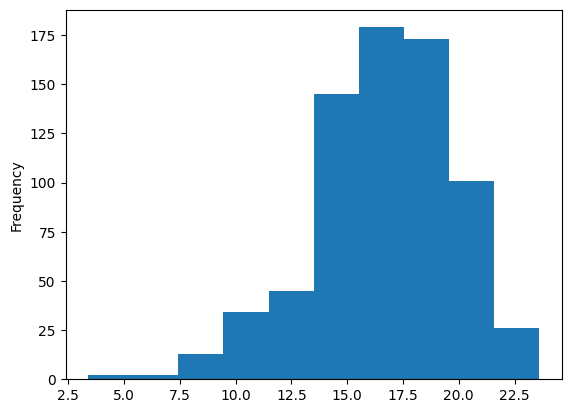

In [51]:
numeric_data['dew'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

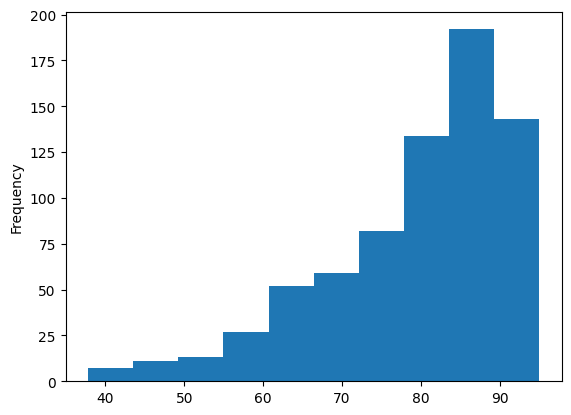

In [52]:
numeric_data['humidity'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

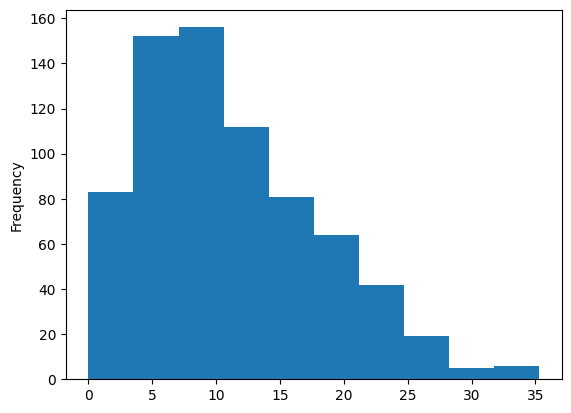

In [53]:
numeric_data['windspeed'].plot(kind = 'hist')

<Axes: >

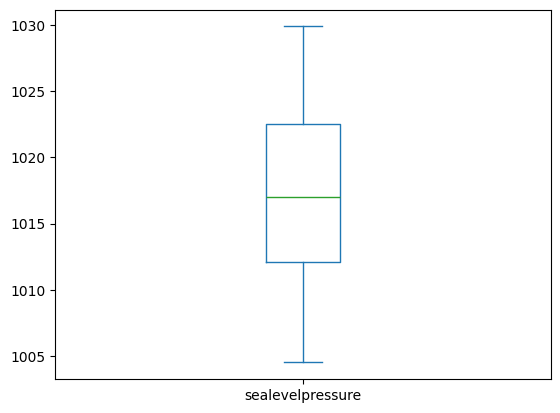

In [54]:
numeric_data['sealevelpressure'].plot(kind = 'box')

<Axes: >

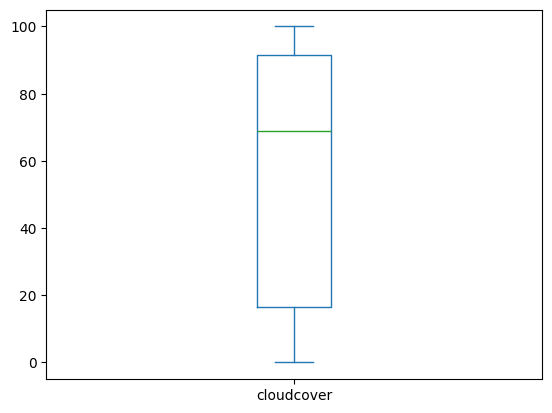

In [55]:
numeric_data['cloudcover'].plot(kind = 'box')

<Axes: >

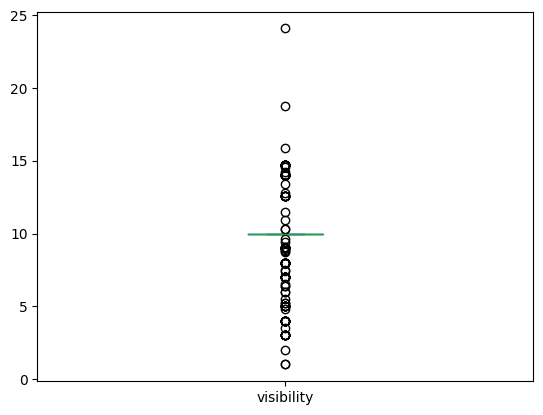

In [56]:
numeric_data['visibility'].plot(kind = 'box')

In [57]:
data.head(3)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01 00:00:00,24.0,22.0,88.60,No rain,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01 01:00:00,21.0,18.0,82.99,No rain,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01 02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"


# Data Preprocessing

###  Select Features (X) and Target (Y) Using Indexing:

### You can index columns by their position or by their names to assign them to X and Y.

### Features (X): The independent variables.
### Target (Y): The dependent variable you are predicting.
### Option 1: Index Columns by Name

In [58]:
data.head(3)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01 00:00:00,24.0,22.0,88.60,No rain,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01 01:00:00,21.0,18.0,82.99,No rain,35.3,1016.0,88.9,8.0,Partially cloudy
2,"Durban,South Africa",2022-04-01 02:00:00,21.7,17.3,76.00,rain,12.3,1016.5,88.9,8.0,"Rain, Partially cloudy"


In [59]:
# Select features (independent variables) by column names
X = data[['temp', 'dew','humidity', 'windspeed', 'sealevelpressure', 'cloudcover', 'visibility']]

# Select the target (dependent variable) by column name
Y_Target1 = data['preciptype']
Y_Target2 = data['weather_condition']
#Y_pr_wc = data[['preciptype','weather_condition']]


In [60]:
print(X)

     temp   dew  humidity  windspeed  sealevelpressure  cloudcover  visibility
0    24.0  22.0     88.60        7.6            1015.0        27.4        10.0
1    21.0  18.0     82.99       35.3            1016.0        88.9         8.0
2    21.7  17.3     76.00       12.3            1016.5        88.9         8.0
3    20.0  17.0     82.87       11.2            1016.0        88.9         8.0
4    19.0  17.0     88.19        1.8            1016.0        88.9        10.0
..    ...   ...       ...        ...               ...         ...         ...
715  18.0  14.0     77.46       11.2            1022.0        27.4        10.0
716  18.9  14.2     74.22        8.2            1023.2        27.4        10.0
717  16.5  13.0     79.80       10.8            1023.0        23.9        24.1
718  16.0  13.0     82.39        9.4            1024.0        41.2        10.0
719  18.2  13.4     73.44        7.7            1024.2        50.5        10.0

[720 rows x 7 columns]


In [61]:
print(Y_Target1)

0      No rain
1      No rain
2         rain
3         rain
4         rain
        ...   
715    No rain
716    No rain
717    No rain
718    No rain
719    No rain
Name: preciptype, Length: 720, dtype: object


### Option 2: Index Columns by Position
### You can use .iloc[] to select features and target by their position in the dataframe

In [62]:
data.head(2)

,name,datetime,temp,dew,humidity,preciptype,windspeed,sealevelpressure,cloudcover,visibility,weather_condition
0,"Durban,South Africa",2022-04-01 00:00:00,24.0,22.0,88.60,No rain,7.6,1015.0,27.4,10.0,Partially cloudy
1,"Durban,South Africa",2022-04-01 01:00:00,21.0,18.0,82.99,No rain,35.3,1016.0,88.9,8.0,Partially cloudy


In [63]:
# Select features (independent variables) by column index positions
#X_iloc = data.iloc[:, [2, 3, 4, 6, 7, 8, 9]]  # Selecting the first seven columns as features

# Select the target (dependent variable) by column index position
#Y_a = data.iloc[:, 5]
#Y_b = data.iloc[:, 10]
#Y_ab = data.iloc[:, [5, 10]]  # The last column  is the target
#print(X_iloc)
#print(Y_a)

### Encoding

#### Converting our cartegorial target labels into Numeric labels

In [64]:
from sklearn.preprocessing import LabelEncoder

# label encode the "preciptype" column
label_encoder = LabelEncoder()
preciptype_encoded = label_encoder.fit_transform(data['preciptype'])

# One hot Encode the 'weather_condition' column
weather_encoded = pd.get_dummies(data, columns = ['weather_condition'])

# Drop the original 'Precipitation' column (optional)
#data_encoded.drop('preciptype', axis=1, inplace=True)

# View the final dataframe
print(preciptype_encoded)

[0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [65]:
print(weather_encoded)

                    name            datetime  temp   dew  humidity preciptype  \
0    Durban,South Africa 2022-04-01 00:00:00  24.0  22.0     88.60    No rain   
1    Durban,South Africa 2022-04-01 01:00:00  21.0  18.0     82.99    No rain   
2    Durban,South Africa 2022-04-01 02:00:00  21.7  17.3     76.00       rain   
3    Durban,South Africa 2022-04-01 03:00:00  20.0  17.0     82.87       rain   
4    Durban,South Africa 2022-04-01 04:00:00  19.0  17.0     88.19       rain   
..                   ...                 ...   ...   ...       ...        ...   
715  Durban,South Africa 2022-04-30 19:00:00  18.0  14.0     77.46    No rain   
716  Durban,South Africa 2022-04-30 20:00:00  18.9  14.2     74.22    No rain   
717  Durban,South Africa 2022-04-30 21:00:00  16.5  13.0     79.80    No rain   
718  Durban,South Africa 2022-04-30 22:00:00  16.0  13.0     82.39    No rain   
719  Durban,South Africa 2022-04-30 23:00:00  18.2  13.4     73.44    No rain   

     windspeed  sealevelpre

### Feature scalling

In [66]:
from sklearn.preprocessing import StandardScaler, RobustScaler



SyntaxError: invalid syntax (24388669.py, line 2)